In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import os
os.chdir('./code/')

In [3]:
from lattices import *

Key result: Let $E, E'$ be elliptic curves. An "isogeny" is a nonconstant morphism $\psi : E \to E'$ of elliptic curves ("morphism of elliptic curves" means $\psi$ takes the identity on $E$ to the identity on $E').
* Every isogeny is a surjective group homomorphism.
* If $\psi' : E \to E'$ and $\psi'': E \to E''$ are isogenies and $\mathrm{ker}(\psi') = \mathrm{ker}(\psi'')$, there is an isomorphism $E' \to E''$ that makes the obvious triangle commute.
Consequently, every isogeny is determined, up to isomorphism, by its kernel (and domain).
Conversely, given a (finite) subgroup $H$ of $E$, we can produce an isogeny with that $H$ as the kernel by computing the quotient $E \to E/H$.

This means we can identify isogenies with pairs $(E,H)$, where $E$ is an elliptic curve and $H$ is a subgroup - given $(E,H)$ we construct the isogeny $E \to E/H$ and given an isogeny $\psi$ we can form the pair $(E, \ker(\psi))$.

In characteristic 0, the degree of $\psi$ is equal to the size of $H$, so isogenies of degree $d$ correspond to subgroups of order $d$. 

For $\tau \in \mathcal{H}$, we write $\Lambda_\tau$ to denote the lattice generated by $1,\tau$ and we set $E_\tau = \mathbb{C}/\Lambda_\tau$.

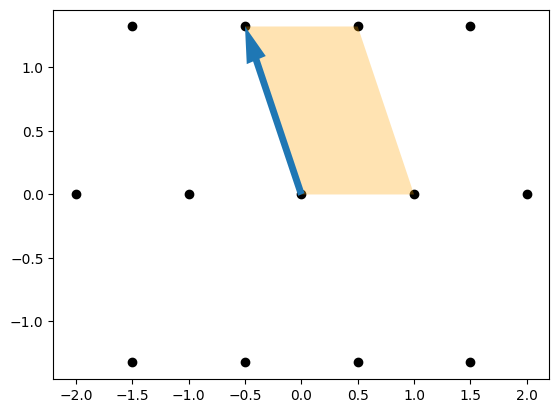

In [45]:
tau7 = np.array([-0.5,np.sqrt(7)/2])
exlattice7 = lattice_pts(np.array([1,0]),tau7,2.5)

plt.scatter(x=exlattice7[::,0],y=exlattice7[::,1],c = 'black')
ax =plt.gca()
fd7 = mpl.patches.Polygon([0*tau7,tau7,np.array([1,0])+tau7,np.array([1,0])],
                          alpha=0.3,facecolor='orange')
ax.add_patch(fd7)
ax.add_patch(mpl.patches.Arrow(0,0,tau7[0],tau7[1],width = 0.3,label = 'tau'))

Given a prime $p$, we want to find all $\tau$ such that $E_\tau$ admits an isogeny $E_\tau \to E_\tau$ of degree $p$ to themselves.

By the abstract nonsense above, we can find all isogenies of degree $p$ that start at $E_\tau$ by finding all subgroups of order $p$.
There are exactly $p+1$ such subgroups.

In [41]:
exlattice7tor5 = lattice_pts(np.array([1,0]),tau7,5*2.5)/5


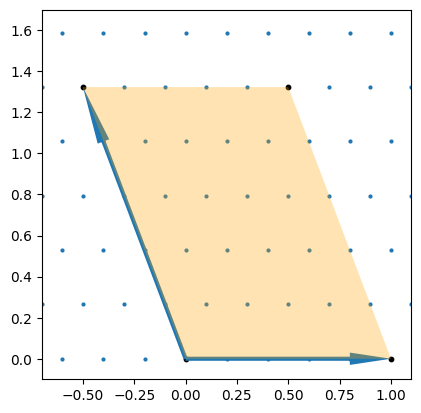

In [54]:
plt.scatter(x=exlattice7tor5[::,0],y=exlattice7tor5[::,1],s=4)

plt.scatter(x=exlattice7[::,0],y=exlattice7[::,1],s=10,c='black')

ax =plt.gca()
fd7 = mpl.patches.Polygon([0*tau7,tau7,np.array([1,0])+tau7,np.array([1,0])],
                          alpha=0.3,facecolor='orange')
ax.add_patch(mpl.patches.Arrow(0,0,tau7[0],tau7[1],width = 0.1,label = 'tau'))
ax.add_patch(mpl.patches.Arrow(0,0,1,0,width = 0.1,label = 'tau'))
ax.add_patch(fd7)
ax.set_ylim((-0.1,1.7))
ax.set_xlim(-0.7,1.1)
ax.set_aspect('equal')

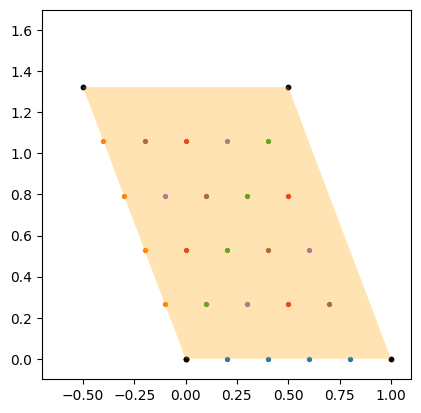

In [73]:
linetuples5 = [[(n,0) for n in range(5)],[(0,n) for n in range(5)]]
for a in range(1,5):
    linetuples5.append([(n,(a*n)%5) for n in range(5)])
exlattice7tor5groups = [np.array([ab[0]*np.array([1,0])+ab[1]*tau7
                        for ab in gr])/5 for gr in linetuples5]

for gr in exlattice7tor5groups:
    plt.scatter(x=gr[::,0],y=gr[::,1],s=8)
plt.scatter(x=exlattice7[::,0],y=exlattice7[::,1],s=10,c='black')

ax =plt.gca()
fd7 = mpl.patches.Polygon([0*tau7,tau7,np.array([1,0])+tau7,np.array([1,0])],
                          alpha=0.3,facecolor='orange')
ax.add_patch(fd7)
ax.set_ylim((-0.1,1.7))
ax.set_xlim(-0.7,1.1)
ax.set_aspect('equal')

## Special Case: $p = 2$

When $p = 2$, there are only $2+1 = 3$ subgroups of order 2 and each of them contains exactly one nonidentity element. 


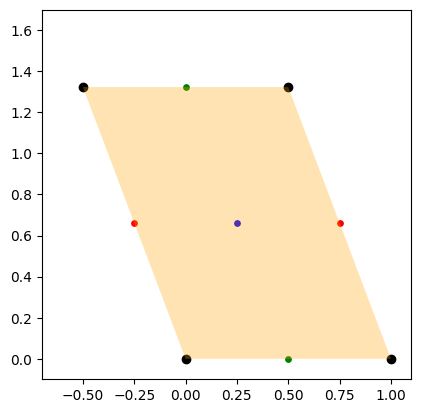

In [80]:

plt.scatter(x=exlattice7[::,0],y=exlattice7[::,1],c = 'black')
plt.scatter(x = [tau7[0]/2,tau7[0]/2+1],y = [tau7[1]/2,tau7[1]/2],s=15,c='r')
plt.scatter(x = [1/2,tau7[0]+1/2],y = [0,tau7[1]],s=15,c='g')
plt.scatter(x = [tau7[0]/2+1/2],y = [tau7[1]/2],s=15,c='b')

ax =plt.gca()
fd7 = mpl.patches.Polygon([0*tau7,tau7,np.array([1,0])+tau7,np.array([1,0])],
                          alpha=0.3,facecolor='orange')
ax.add_patch(fd7)

ax.set_ylim((-0.1,1.7))
ax.set_xlim(-0.7,1.1)
ax.set_aspect('equal')

The quotient by $\frac{\tau}{2}+\Lambda_\tau$ is simply equal to $E_{\tau/2}$:

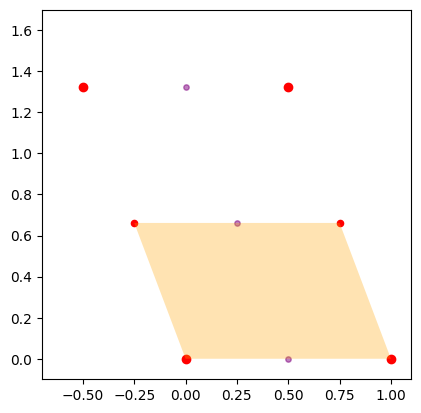

In [83]:

plt.scatter(x=exlattice7[::,0],y=exlattice7[::,1],c = 'red')
plt.scatter(x = [tau7[0]/2,tau7[0]/2+1],y = [tau7[1]/2,tau7[1]/2],s=20,c='red')
plt.scatter(x = [1/2,tau7[0]+1/2],y = [0,tau7[1]],s=15,c='purple',alpha=0.5)
plt.scatter(x = [tau7[0]/2+1/2],y = [tau7[1]/2],s=15,c='purple',alpha = 0.5)

ax =plt.gca()
fd7 = mpl.patches.Polygon([0*tau7,tau7/2,np.array([1,0])+tau7/2,np.array([1,0])],
                          alpha=0.3,facecolor='orange')
ax.add_patch(fd7)

ax.set_ylim((-0.1,1.7))
ax.set_xlim(-0.7,1.1)
ax.set_aspect('equal')

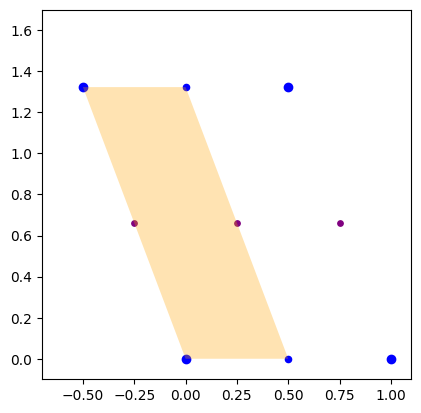

In [86]:

plt.scatter(x=exlattice7[::,0],y=exlattice7[::,1],c = 'b')
plt.scatter(x = [tau7[0]/2,tau7[0]/2+1],y = [tau7[1]/2,tau7[1]/2],s=15,c='purple')
plt.scatter(x = [1/2,tau7[0]+1/2],y = [0,tau7[1]],s=20,c='blue')
plt.scatter(x = [tau7[0]/2+1/2],y = [tau7[1]/2],s=15,c='purple')

ax =plt.gca()
fd7 = mpl.patches.Polygon([0*tau7,tau7,np.array([1/2,0])+tau7,np.array([1/2,0])],
                          alpha=0.3,facecolor='orange')
ax.add_patch(fd7)

ax.set_ylim((-0.1,1.7))
ax.set_xlim(-0.7,1.1)
ax.set_aspect('equal')

Starting from any $\tau$, we can find a list $\tau_0, \tau_1, ..., \tau_p$ in the upper half plane of representatives for the $p+1$ codomains of isogenies of degree $p$ that start at $E_\tau$.

In the example above, with $p = 2$, we have $\tau_0 = \frac{\tau}{2}$,$\tau_1 = \frac{\tau+1}{2}$ and $\tau_2 = 2\tau$.

* $E_\tau$ has an endomorphism of degree 2 if and only if one of the codomains of the three isogenies of degree 2 is isomorphic to $E_\tau$.
* Two elements of upper half plane represent isomorphic elliptic curves iff they are in the same $SL_2(\mathbb{Z})$ orbit.
* To determine whether $E_\tau$ has an endomorphism of degree 2, we just have to check whether any of the points $\frac{\tau}{2},2\tau, \frac{\tau+1}{2}$ are in the same $SL_2(\mathbb{Z})$ orbit as $\tau$.

Since this only depends on the $SL_2(\mathbb{Z})$ orbit, we may assume $\tau$ is in the usual fundamental domain ($|\tau|\geq 1, -1/2 \leq Re(\tau) < 1/2$).

Claim: If $\tau$ is in the usual fundamental domain, then $2\tau$ is not in the same orbit as $\tau$.

* If $|Re(\tau)|\leq \frac{1}{4}$, then $2\tau$ is also in the fundamental domain, and $2\tau \neq \tau$. Thus, $\tau, 2\tau$ are not in the same orbit because they are represented by different points on the fundamental domain.
* If $|Re(\tau)| \geq \frac{1}{4}$, then the real part of $2\tau$ is not in the correct range.
* Replacing $2\tau$ by one of $2\tau\pm 1$ lands us in the band $|Re(\tau)|<\frac{1}{2}$. Note that the imaginary part of $\tau$ is at least $\frac{\sqrt{3}}{2}$ so the imaginary part of $2\tau\pm 1$ is at least $\sqrt{3}$.
This means that $2\tau \pm 1$ is guaranteed to be in the fundamental domain.

In all cases, exactly one of $2\tau, 2\tau + 1, 2\tau - 1$ lies in the fundamental domain and represents the same class as $2\tau$.
The imaginary part of this representative is strictly greater than the imaginary part of $\tau$ so they must represent distinct curves.

In [ ]:
def x1pts(height,density):
    pts = [np.array([x,y])/(2*density) for x in range(-density,density+1)
           for y in range(density,2*height*density+1)]
    return np.array([pt for pt in pts if np.dot(pt,pt)>=1])

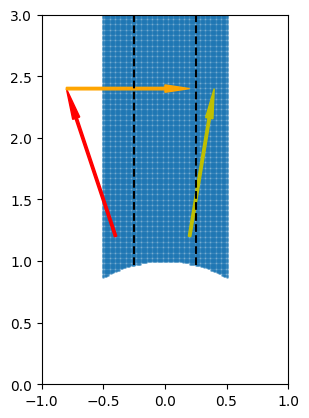

In [119]:
x1_ex = x1pts(3,50)
plt.vlines(x=[-0.25,0.25],ymin = [np.sqrt(1-1/16),np.sqrt(1-1/16)], ymax = [3,3],color='black',
           linestyles='dashed')
plt.scatter(x=x1_ex[::,0],y=x1_ex[::,1],s=1,alpha=0.5)
ax =plt.gca()
ax.set_xlim(-1,1)
ax.set_ylim(0,3)
ax.add_patch(mpl.patches.Arrow(0.2,1.2,0.2,1.2,width = 0.1,color = 'y'))
ax.add_patch(mpl.patches.Arrow(-0.4,1.2,-0.4,1.2,width = 0.1,color = 'r'))
ax.add_patch(mpl.patches.Arrow(-0.8,2.4,1,0,width = 0.1,color = 'orange'))
ax.set_aspect('equal')

Next, we turn our attention to the isogeny $\tau \mapsto \frac{\tau}{2}$.

Suppose $\tau$ is in the fundamental domain and $|\tau| \geq 2$.
* $|Re(\tau/2)| = |Re(\tau)|/2 \leq \frac{1}{4} < \frac{1}{2}$.
* $ |\tau/2| = |\tau|/2 \geq 1$.
* Altogether, this means $\frac{\tau}{2}$ is also in the fundamental domain.
* Since $\tau \neq \tau/2$ we conclude that $\tau \to \tau/2$ is not an endomorphism.

Thus, we only have to check $\tau$ satisfying $|\tau|\leq 2$.

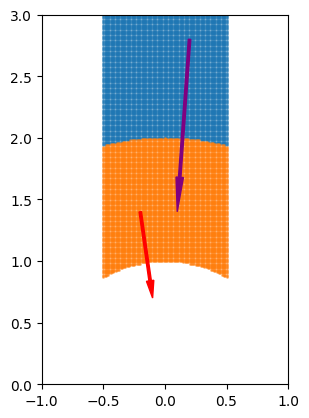

In [129]:
x1_ex_2pl = np.array([pt for pt in x1_ex if np.dot(pt,pt)>4])
x1_ex_2neg = np.array([pt for pt in x1_ex if np.dot(pt,pt)<=4])
plt.scatter(x=x1_ex_2pl[::,0],y=x1_ex_2pl[::,1],s=1,alpha=0.5)
plt.scatter(x=x1_ex_2neg[::,0],y=x1_ex_2neg[::,1],s=1,alpha=0.5)
ax =plt.gca()
ax.set_xlim(-1,1)
ax.set_ylim(0,3)
ax.add_patch(mpl.patches.Arrow(0.2,2.8,-0.1,-1.4,width = 0.1,color = 'purple'))
ax.add_patch(mpl.patches.Arrow(-0.2,1.4,0.1,-0.7,width = 0.1,color = 'r'))
ax.set_aspect('equal')

Assume $|\tau| \leq 2$ - so we're in the orange region.
* Dividing by 2 brings us inside the unit circle. 
* The map $\tau\mapsto \frac{-1}{\tau}$ gives us a point in the same orbit which is not in the unit circle. 

The composition of the two transformations is $\tau \mapsto \frac{-2}{\tau}$.

* If $\tau = \sqrt{-2}$ then $\tau\mapsto \frac{-2}{\tau} = \sqrt{-2} = \tau$ is in an endomorphism.
* If $\frac{-2}{\tau}$ is in the fundamental domain and $\tau \neq \sqrt{-2}$, then we do not have an endomorphism.
* We have to determine when $\frac{-2}{\tau}$ is in the fundamental domain - i.e. when the real part of $\frac{-2}{\tau}$ is between $\pm \frac{1}{2}$.

In [130]:
sqrtn1 = np.roots([1,0,1])[0]
cbasis = np.array([1,sqrtn1])
x1_ex_2neg_cx = [np.dot(cbasis,pt) for pt in x1_ex_2neg]
x1_ex_2neg_cx_transformed = [-2/tau for tau in x1_ex_2neg_cx]
x1_ex_2neg_transformed = np.array([np.array([tau.real,tau.imag])
                                    for tau in x1_ex_2neg_cx_transformed])

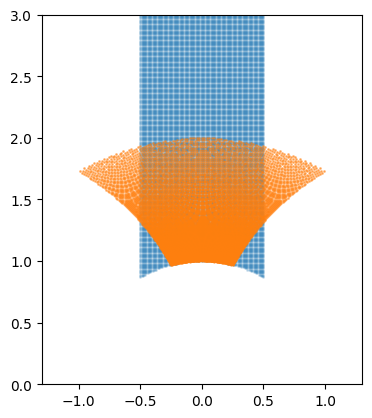

In [132]:
plt.scatter(x=x1_ex[::,0],y=x1_ex[::,1],
            s=1,alpha=0.2)
plt.scatter(x=x1_ex_2neg_transformed[::,0],y=x1_ex_2neg_transformed[::,1],
            s=1,alpha=0.5)
ax =plt.gca()
ax.set_xlim(-1.3,1.3)
ax.set_ylim(0,3)
ax.set_aspect('equal')

After applying $\tau\mapsto \frac{-2}{\tau}$, either we land in the fundamental domain, or we land just to the left/right. If we land on the left, adding 1 brings us to the fundamental domain. If we land on the right, subtracting 1 brings us to the fundamental domain.

Altogether, we've shown that if $|\tau|\leq 2$ is in the fundamental domain, the possible representatives for $\frac{\tau}{2}$ are $\frac{-2}{\tau}, \frac{-2}{\tau}\pm 1$.

In [133]:
x1_ex_2neg_groups = [[],[],[]]
x1_ex_2neg_tr_groups = [[],[],[]]

for i, pt in enumerate(x1_ex_2neg_transformed):
    if pt[0]<-0.5:
        x1_ex_2neg_tr_groups[0].append(pt)
        x1_ex_2neg_groups[0].append(x1_ex_2neg[i])
    elif pt[0]>0.5:
        x1_ex_2neg_tr_groups[2].append(pt)
        x1_ex_2neg_groups[2].append(x1_ex_2neg[i])
    else:
        x1_ex_2neg_tr_groups[1].append(pt)
        x1_ex_2neg_groups[1].append(x1_ex_2neg[i])

        

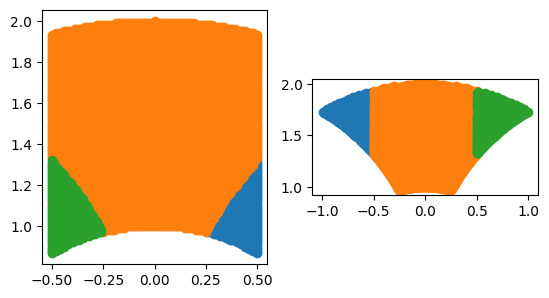

In [137]:
fig, (ax1,ax2) = plt.subplots(1,2)

for gr in x1_ex_2neg_groups:
    gra = np.array(gr)
    ax1.scatter(x=gra[::,0],y=gra[::,1])

ax1.set_aspect('equal')
ax2.set_aspect('equal')


for gr in x1_ex_2neg_tr_groups:
    gra = np.array(gr)
    ax2.scatter(x=gra[::,0],y=gra[::,1])

* For $\tau$ in the orange region, $\frac{\tau}{2}$ is represented by $\frac{-2}{\tau}$. For points in this region, the isogeny $\tau \mapsto \frac{\tau}{2}$ is an endomorphism if and only if $\tau = \sqrt{-2}$.
* For $\tau$ in the blue region, we need $\frac{-2}{\tau}+1= \tau$. This happens precisely when $\tau$ is a root of $x^2 - x + 2 = 0$, so $\tau = \frac{1+\sqrt{-7}}{2}$ (since $\tau$ has to be in the upper half plane).
* For $\tau$ in the green region, we need $\frac{-2}{\tau}-1= \tau$. This happens precisely when $\tau$ is a root of $x^2 + x + 2 = 0$, so $\tau = \frac{-1+\sqrt{-7}}{2}$. 
Note that the second two $\tau$'s are equivalent mod $SL_2$. (they differ by 1).


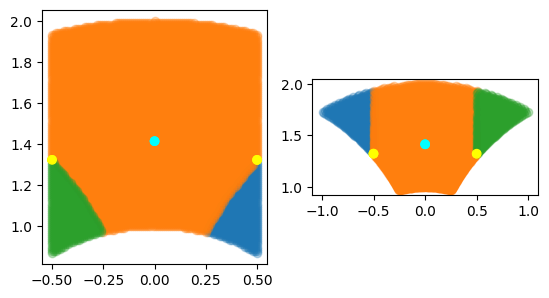

In [145]:
fig, (ax1,ax2) = plt.subplots(1,2)

for gr in x1_ex_2neg_groups:
    gra = np.array(gr)
    ax1.scatter(x=gra[::,0],y=gra[::,1],alpha=0.3)
    ax1.scatter(x = [-0.5,0,0.5],y=[np.sqrt(7/4),np.sqrt(2),np.sqrt(7/4)],c=['yellow','cyan','yellow'])

ax1.set_aspect('equal')
ax2.set_aspect('equal')


for gr in x1_ex_2neg_tr_groups:
    gra = np.array(gr)
    ax2.scatter(x=gra[::,0],y=gra[::,1],alpha=0.3)
    ax2.scatter(x = [-0.5,0,0.5],y=[np.sqrt(7/4),np.sqrt(2),np.sqrt(7/4)],c=['yellow','cyan','yellow'])



We've now found 2 $\tau$'s with endomorphisms of degree 2. 
To complete the classification, we just need to repeat what we just did for $\tau\mapsto \frac{\tau+1}{2}$. 

In [162]:
x1_ex_cx = [np.dot(cbasis,pt) for pt in x1_ex]
x1_ex_cx_tr2 = [(1+tau)/2 for tau in x1_ex_cx]
x1_ex_groups = [[],[],[],[]]
x1_ex_tr2_groups = [[],[],[],[]]
for i,tau in enumerate(x1_ex_cx_tr2):
    pt = np.array([tau.real,tau.imag])
    if np.dot(pt,pt)>=1 and abs(pt[0])<=0.5:
        x1_ex_groups[0].append(x1_ex[i])
        x1_ex_tr2_groups[0].append(pt)
    elif np.dot(pt,pt)>= 1 and pt[0]>0.5:
        ptvar = pt-np.array([1,0])
        if np.dot(ptvar,ptvar)>= 1:
            x1_ex_groups[1].append(x1_ex[i])
            x1_ex_tr2_groups[1].append(pt - np.array([1,0]))
        else:
            newtau = -1/np.dot(ptvar,cbasis)
            pt2 = np.array([newtau.real,newtau.imag])
            x1_ex_groups[2].append(x1_ex[i])
            x1_ex_tr2_groups[2].append(pt2)
    else:
        newtau = -1/np.dot(pt,cbasis)
        pt2 = np.array([newtau.real,newtau.imag])
        x1_ex_groups[3].append(x1_ex[i])
        x1_ex_tr2_groups[3].append(pt2)

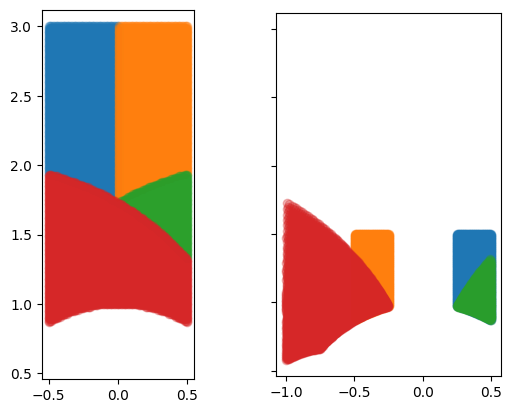

In [163]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)

for gr in x1_ex_groups:
    if len(gr)>0:
        gra = np.array(gr)
        ax1.scatter(x=gra[::,0],y=gra[::,1],alpha=0.3)

ax1.set_aspect('equal')
ax2.set_aspect('equal')


for gr in x1_ex_tr2_groups:
    if len(gr)>0:
        gra = np.array(gr)
        ax2.scatter(x=gra[::,0],y=gra[::,1],alpha=0.3)


Things get messy.

Instead, we use $X_0(2)$.
Here's how this changes things:
* So far, we've been starting with a single $\tau$ in the standard fundamental domain, and applying 3 different transformations to $\tau$.
* What we're now going to do is choose 3 different $\tau$'s from a region that contains 3 copies of the original fundamental domain, and apply a single transformation to all of them.

In [251]:
x1_ex_cx_tr0 = [-1/tau for tau in x1_ex_cx]
x1_ex_cx_tr1 = [-1/(tau+1) for tau in x1_ex_cx]

mats =[np.array([np.array([1,0]),np.array([0,1])]),
       np.array([np.array([0,-1]),np.array([1,0])]),
       np.array([np.array([0,-1]),np.array([1,1])])]

ptgroups = [x1_ex]
for group in [x1_ex_cx_tr0,x1_ex_cx_tr1]:
    ptgroups.append(np.array([np.array([tau.real,tau.imag])
                                    for tau in group]))




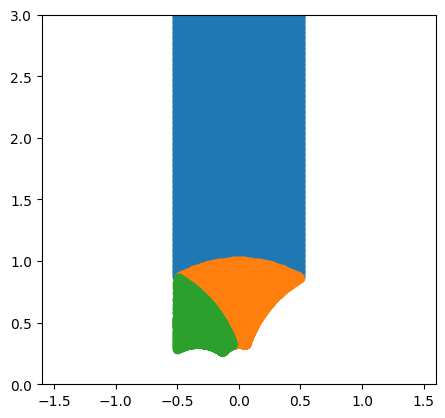

In [252]:
for pts in ptgroups:
    plt.scatter(x=pts[::,0],y=pts[::,1])

ax =plt.gca()
ax.set_xlim(-1.6,1.6)
ax.set_ylim(0,3)
ax.set_aspect('equal')

Starting from $\tau$ in the original fundamental domain, we obtain a list of 3 $\tau$'s: $\tau, \frac{-1}{\tau+1}, \frac{-1}{\tau}$. These lie in the blue, green and orange regions respectively. 

Now we apply the map $z\mapsto \frac{-1}{2z}$ to all three of these elements.
* The first element - which was originally in the blue region - is mapped to $\frac{-1}{2\tau}$. Note that $\frac{-1}{2\tau}$ represents the same curve as $2\tau$, so our original point represents $\tau\mapsto 2\tau$ in this picture. 
* The second element - in the green region - gets mapped to $\frac{-1}{2\cdot \frac{-1}{\tau+1}} = \frac{\tau+1}{2}$. Thus the point in the green region represents the isogeny $\tau \to \frac{1+\tau}{2}$, which was giving us trouble earlier.
* Finally, the third element - that started in the orange region - gets mapped to $\frac{-1}{2\cdot\frac{-1}{\tau}}= \frac{\tau}{2}$. This clearly represents the codomain of $\tau \mapsto \frac{\tau}{2}$.



Thus, we can study all 3 isogenies ($\tau \mapsto 2\tau, \tau\mapsto \frac{\tau}{2}, \tau\mapsto \frac{1+\tau}{2}$) at the same time by working with this larger region, which is composed of 3 "copies" of the original region" and using this single function $\tau\mapsto \frac{-1}{2\tau}$.
Note that this function $\tau\mapsto \frac{-1}{2\tau}$ is an involution - it is called "the Fricke involution".

I will denote it by $\mathrm{Fr}_2$ - the subscript 2 indicates that we're working with the curve $X_0(2)$. There is a similar involution $\mathrm{Fr}_\ell : X_0(\ell)\to X_0(\ell)$, defined by $\tau \mapsto \frac{-1}{\ell\tau}$ for each $\ell>1$.

In [264]:
ptgroupsFr = []
for group in [x1_ex_cx,x1_ex_cx_tr0,x1_ex_cx_tr1]:
    ptgroupsFr.append(np.array([np.array([(-1/(2*tau)).real,(-1/(2*tau)).imag])
                                    for tau in group]))




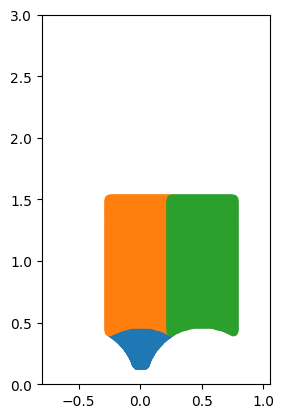

In [265]:
xmin = -0.5
xmax = 0.5
ymax = 3
for pts in ptgroupsFr:
    plt.scatter(x=pts[::,0],y=pts[::,1])
    xmin = min(xmin,min(pts[::,0]))
    xmax = max(xmax,max(pts[::,0]))
    ymax = max(ymax,max(pts[::,1]))

ax =plt.gca()
ax.set_xlim((xmin-0.3,xmax+0.3))
ax.set_ylim(0,ymax)
ax.set_aspect('equal')

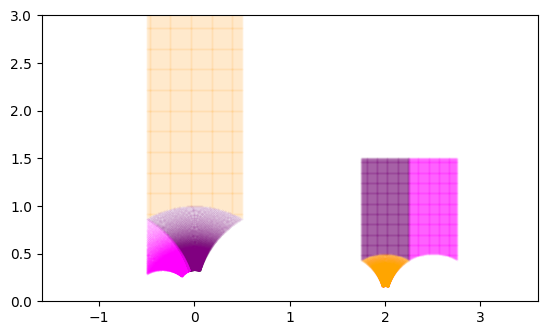

In [269]:
colors = ['orange','purple','magenta']
for i, pts in enumerate(ptgroups):
    plt.scatter(x=pts[::,0],y=pts[::,1],alpha=0.1,c=colors[i],s=0.1)

for i, pts in enumerate(ptgroupsFr):
    plt.scatter(x=pts[::,0]+2,y=pts[::,1],alpha=0.1,c=colors[i],s=0.1)

ax =plt.gca()
ax.set_xlim(-1.6,3.6)
ax.set_ylim(0,3)
ax.set_aspect('equal')

## Main conclusions

* Up to $\Gamma_0(2)$ equivalence, the map $\tau\mapsto \frac{-1}{2\tau}$ has precisely 2 fixed points: $\tau = \sqrt{-2}$, and $\tau = 1+i$.
* There are two more points that get swapped by the Fricke involution, and are not equal mod $\Gamma_0(2)$, but which are equivalent mod $\Gamma(1)$. These correspond to the $\tau = \frac{1+\sqrt{-7}}{2}$ fixed points we found earlier.

Altogether, there are 4 points on $X_0(2)$ that represent endomorphisms: the two fixed points of Fricke and the pair with $\sqrt{-7}$.

### The diagonal

Let $\ell>1$ be an integer and let $X_0(\ell)$ be the modular curve of level $\ell$.

* We have the Fricke involution $\mathrm{Fr}_\ell: X_0(\ell)\to X_0(\ell)$.
* We have the natural covering map $j_\ell : X_0(\ell)\to X(1)$.
* To find all points on $X_0(\ell)$ that represent endomorphisms, we need to compute the fiber product of $j_\ell$ and $j_\ell \circ \mathrm{Fr}_\ell$.

We will refer to this fiber product as the "diagonal of $X_0(\ell)$"
and denote it by $X_0(\ell)_\Delta$.

* If $\ell$ is a prime, then $X_0(\ell)_\Delta$ contains exactly $2\ell$ points.
* Every fixed point of the Fricke involution lies on the diagonal, but there are  also points on the diagonal which are not fixed by Fricke.

The fact that $X_0(\ell)_\Delta$ has exactly $2\ell$ points means that up to isomorphism, there are precisely $2\ell$ isogenies of degree $\ell$ divided up among all elliptic curves. Some elliptic curves will have one isogeny of degree $\ell$, up to isomorphism, and others will have two distinct endomorphisms of degree $\ell$ (distinct = there is no automorphism of $E$ that takes the kernel of one isogeny to the kernel of the other).
The exact number of endomorphisms depends on whether the associated point on $X_0(\ell)$ is a fixed point of the Fricke involution.

### $j$-invariants

We can construct a polynomial that summarizes all of this information- both the elliptic curves involved and the number of endomorphisms - as follows:

First, we use the $j$-invariant to encode the elliptic curve. We're going to abuse notation and write $j_\ell$ to denote the composition of the covering map $X_0(\ell)\to X(1)$ and the $j$-invariant $X(1)\to \mathbb{P}^1$.
Then we define $$\Delta_2(x) = \prod_{\tau \in X_0(\ell)_\Delta} x - j_\ell(\tau)$$

Note that this polynomial always has integer coefficients (even if some of the roots are not integers themselves).

For the $\ell = 2$ case, we have $j(i) = 1728, j(\sqrt{-2})=8000, j(\frac{1+\sqrt{-7}}{2})= -3375$ so $$\Delta_2(x) = (x-1728)(x-8000)(x+3375)^2$$.



### Elliptic curves mod $\ell$

Here's the "magic observation" that ties everything together: for a prime $p$,
we have:
$$ \Delta_p(x) \equiv \prod_{j = 0}^{p-1}(x-j)^2 \pmod{p}$$
In other words, this polynomial of degree $2p$ that we've constructed is a square mod $p$, and every element mod $p$ appears exactly twice as a root.

For example, when $p = 2$, the first two factors both reduce to $x$ mod 2 and the third factor reduces to $(x+1)^2$ mod 2 so altogether we just have $x^2(x+1)^2$ mod 2.

We're going to explore this in the next notebook, but we're going to use a different perspective.
